In [18]:
%matplotlib inline

import pymc3 as pm
import numpy as np
import scipy as sp

from IPython.core.pylabtools import figsize
import seaborn as sns
import matplotlib.pyplot as plt

figsize(12, 6)

In [12]:
def out_of(a, b):
    return [(1 if i < a else 0) for i in range(b)]


def find_theta(a):
    N_sample = 10000
    N_take = 5000

    with pm.Model():
        theta = pm.Beta('theta', alpha=5, beta=5)

        data  = pm.Bernoulli('data', p=theta, observed=a)

        # Sample Time
        start = pm.find_MAP()
        step  = pm.Slice()
        trace = pm.sample(N_sample, step=step, start=start)

    return trace['theta'][N_take:]

In [13]:
male_high = out_of(13, 80)
male_low  = out_of(1, 78)
fem_high  = out_of(3, 79)
fem_low   = out_of(5, 79)

In [14]:
theta_mh = find_theta(male_high)
theta_ml = find_theta(male_low)
theta_fh = find_theta(fem_high)
theta_fl = find_theta(fem_low)

Optimization terminated successfully.
         Current function value: 38.590498

100%|██████████| 10000/10000 [00:07<00:00, 1387.94it/s]



         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.458385

100%|██████████| 10000/10000 [00:07<00:00, 1348.50it/s]



         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 20.457003
         Iterations: 7


100%|██████████| 10000/10000 [00:07<00:00, 1287.76it/s]


         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 24.830686

100%|██████████| 10000/10000 [00:07<00:00, 1334.31it/s]


         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8


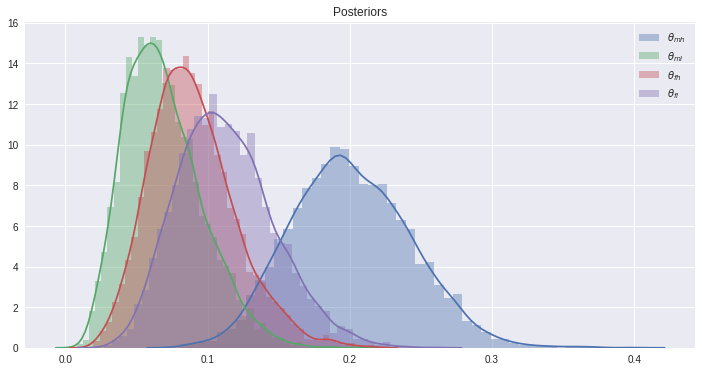

In [19]:
sns.distplot(theta_mh, label=r'$\theta_{mh}$')
sns.distplot(theta_ml, label=r'$\theta_{ml}$')
sns.distplot(theta_fh, label=r'$\theta_{fh}$')
sns.distplot(theta_fl, label=r'$\theta_{fl}$')
plt.legend()
plt.title('Posteriors')

In [21]:
theta_m = find_theta(male_high + male_low)
theta_f = find_theta(fem_high + fem_low)
theta_h = find_theta(male_high + fem_high)
theta_l = find_theta(male_low + fem_low)

Optimization terminated successfully.
         Current function value: 52.847889
         Iterations: 7
         Function evaluations: 8


100%|██████████| 10000/10000 [00:07<00:00, 1356.25it/s]


         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 39.304994

100%|██████████| 10000/10000 [00:07<00:00, 1332.78it/s]



         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 56.984775
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8


100%|██████████| 10000/10000 [00:07<00:00, 1369.81it/s]


Optimization terminated successfully.
         Current function value: 34.104862
         Iterations: 8

100%|██████████| 10000/10000 [00:07<00:00, 1350.22it/s]


         Function evaluations: 9
         Gradient evaluations: 9


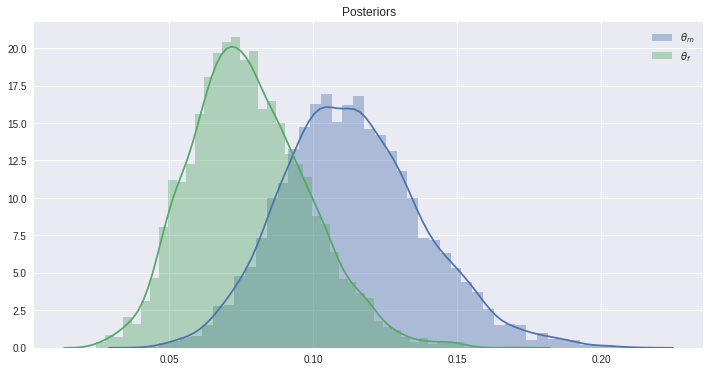

In [22]:
sns.distplot(theta_m, label=r'$\theta_{m}$')
sns.distplot(theta_f, label=r'$\theta_{f}$')
plt.legend()
plt.title('Posteriors')

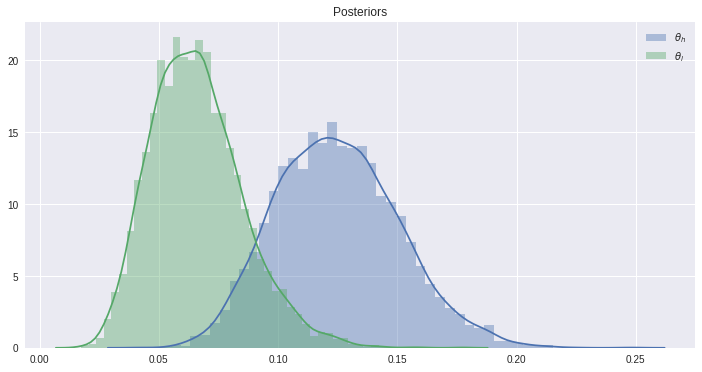

In [23]:
sns.distplot(theta_h, label=r'$\theta_{h}$')
sns.distplot(theta_l, label=r'$\theta_{l}$')
plt.legend()
plt.title('Posteriors')